<a href="https://colab.research.google.com/github/Rutba/learning_project/blob/main/Bike_sharing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from google.colab import files
uploaded = files.upload()




Saving hour.csv to hour.csv


In [5]:
#load hourly data
hourly_data = pd.read_csv('hour.csv')

print(hourly_data)

       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1              

In [6]:
# Some generic statistics about the data

print(f"Shape of data: {hourly_data.shape}")

Shape of data: (17379, 17)


In [ ]:
print(f"Number of missing values in the data:\ {hourly_data.isnull().sum()}")

Number of missing values in the data:\ instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [7]:
# get statistics on the numerical columns
hourly_data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [8]:
# create a copy of the original dataset
#(so that we do not want a specific transformation to affect our initial data)

preprocessed_data = hourly_data.copy()


In [9]:
# transform seasons

seasons_mapping = {1:'winter',
                   2:'spring',
                   3:'summer',
                   4:'fall'}
preprocessed_data['season'] = preprocessed_data['season'].apply(lambda x: seasons_mapping[x])

print(preprocessed_data['season'])

0        winter
1        winter
2        winter
3        winter
4        winter
          ...  
17374    winter
17375    winter
17376    winter
17377    winter
17378    winter
Name: season, Length: 17379, dtype: object


In [10]:
#transform year
yr_mapping = {0 : 2011, 1: 2012}
preprocessed_data['yr'] = preprocessed_data['yr'].apply(lambda x : yr_mapping[x])

print(preprocessed_data['yr'])

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
17374    2012
17375    2012
17376    2012
17377    2012
17378    2012
Name: yr, Length: 17379, dtype: int64


In [11]:
#transform weekday

weekday_mapping = {0 : 'Sunday',
                   1 : 'Monday',
                   2 : 'Tuesday',
                   3 : 'Wednesday',
                   4 : 'Thursday',
                   5 : 'Friday',
                   6 : 'Saturday'}

preprocessed_data['weekday'] = preprocessed_data['weekday'].apply(lambda x : weekday_mapping[x])

print(preprocessed_data['weekday'])

0        Saturday
1        Saturday
2        Saturday
3        Saturday
4        Saturday
           ...   
17374      Monday
17375      Monday
17376      Monday
17377      Monday
17378      Monday
Name: weekday, Length: 17379, dtype: object


In [12]:
# Transform weathersit
weather_mapping = {1: 'clear',
                   2: 'cloudy',
                   3: 'light_rain_snow',
                   4: 'heavy_rain_snow'}

preprocessed_data['weathersit'] = preprocessed_data['weathersit'].apply(lambda x: weather_mapping[x])

print(preprocessed_data['weathersit'])

0         clear
1         clear
2         clear
3         clear
4         clear
          ...  
17374    cloudy
17375    cloudy
17376     clear
17377     clear
17378     clear
Name: weathersit, Length: 17379, dtype: object


In [13]:
# transform hum and windspeed
preprocessed_data['hum'] = preprocessed_data['hum']*100

preprocessed_data['windspeed'] = preprocessed_data['windspeed']*67

print(preprocessed_data['hum'])

print(preprocessed_data['windspeed'])


0        81.0
1        80.0
2        80.0
3        75.0
4        75.0
         ... 
17374    60.0
17375    60.0
17376    60.0
17377    56.0
17378    65.0
Name: hum, Length: 17379, dtype: float64
0         0.0000
1         0.0000
2         0.0000
3         0.0000
4         0.0000
          ...   
17374    11.0014
17375    11.0014
17376    11.0014
17377     8.9981
17378     8.9981
Name: windspeed, Length: 17379, dtype: float64


In [14]:
#visualize preprocessed columns

cols = ['season', 'yr', 'weekday', 'weathersit', 'hum', 'windspeed']

preprocessed_data[cols].sample(10, random_state=123)

,season,yr,weekday,weathersit,hum,windspeed
5792,summer,2011,Saturday,clear,74.0,8.9981
7823,fall,2011,Sunday,clear,43.0,31.0009
15426,fall,2012,Tuesday,cloudy,77.0,6.0032
15028,fall,2012,Sunday,clear,51.0,22.0028
12290,spring,2012,Friday,cloudy,89.0,12.9980
3262,spring,2011,Friday,clear,64.0,7.0015
10763,spring,2012,Thursday,clear,42.0,23.9994
12384,spring,2012,Tuesday,light_rain_snow,82.0,11.0014
6051,summer,2011,Wednesday,clear,52.0,19.0012
948,winter,2011,Saturday,clear,80.0,0.0000


# Registered VS Casual Use analysis

In [15]:
"""
assert that total number of rides is equal to the sum of
registered and casual ones

"""

assert (preprocessed_data.casual + preprocessed_data.registered == preprocessed_data.cnt).all(),"Sum of casual and registered rides not equal to total number of rides"


<ipython-input-17-a4c25418c3eb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(preprocessed_data['registered'], label='registered')
<ipython-input-17-a4c25418c3eb>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(preprocessed_data['casual'], label='casual')


Text(0.5, 1.0, 'Rides distributions')

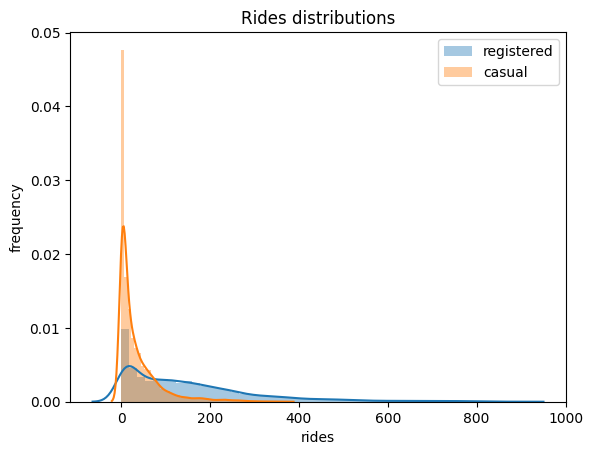

In [17]:
# plot distributions of rigistered vs casual rides

sns.distplot(preprocessed_data['registered'], label='registered')
sns.distplot(preprocessed_data['casual'], label='casual')

plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Rides distributions")
#plt.savefig('figs/rides_distributions.png', format = 'png')


Text(0.5, 1.0, '1.4:Evolution of the number of rides per day for registered and casual customers')

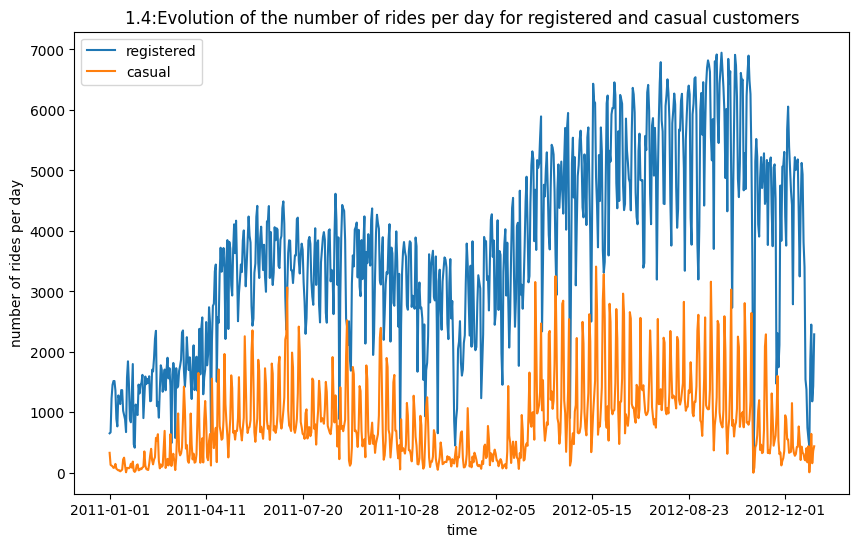

In [19]:
#plot evalusation of rides over time

plot_data = preprocessed_data[ ['registered', 'casual', 'dteday']]
ax = plot_data.groupby('dteday').sum().plot(figsize = (10,6))

ax.set_xlabel('time');
ax.set_ylabel('number of rides per day');
plt.title("1.4:Evolution of the number of rides per day for registered and casual customers")
#plt.savefig('figs/rides_daily.png', format = 'png')


From the preceding figure, the number of registered rides is always above and significantly higher than the number of casual rides per day. Furthermore, we can observe that during winter, the overall number of rides decreases (which is totally in line with our expectations, as bad weather and low temperatures have a negative impact on ride sharing services). Note that there is quite a lot of variance in the time series of the rides in Figure 1.4. One way to smooth out the curves is to take the rolling mean and standard deviation of the two time series and plot those instead. In this way, we can visualize not only the average number of rides for a specific time period (also known as a window) but also the expected deviation from the mean:

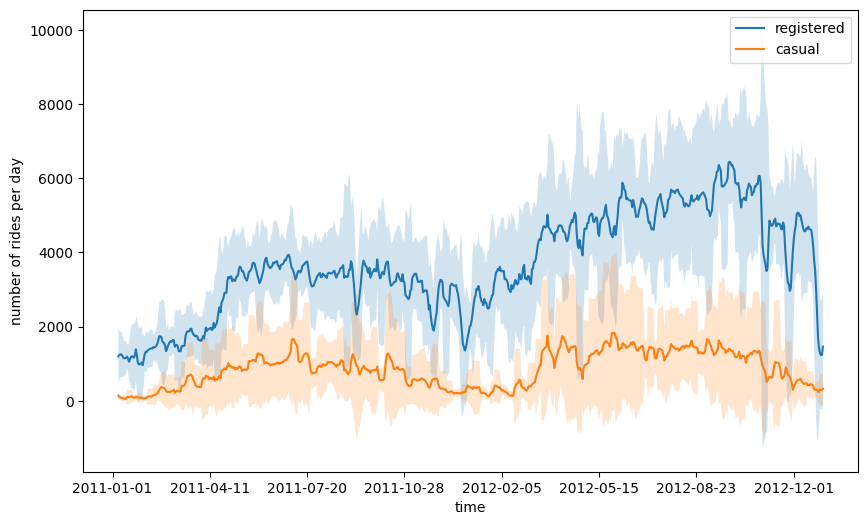

In [21]:
"""
Create new dataframe with necessary for plotting columns, and obtain number of rides per day,
by grouping over each day

"""
plot_data = preprocessed_data[ ['registered', 'casual', 'dteday']]
plot_data = plot_data.groupby('dteday').sum()


"""
Define window for computing the rolling mean and standard deviation
"""
window = 7
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()


"""
Create a plot of the series, where we first plot the series of rolling means,
then we color the zone between the series of rolling means +- 2 rolling standard deviations

"""
ax = rolling_means.plot(figsize = (10,6))
ax.fill_between(rolling_means.index, rolling_means['registered'] + 2*rolling_deviations['registered'],
                 rolling_means['registered'] - 2*rolling_deviations['registered'], alpha = 0.2)

ax.fill_between(rolling_means.index, rolling_means['casual'] + 2*rolling_deviations['casual'],

                rolling_means['casual'] - 2*rolling_deviations['casual'], alpha = 0.2)


ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");
#plt.savefig('figs/rides_aggregated.png', format='png')

In order to compute the rolling statistics (that is, the mean and standard deviation), we use the rolling() function, in which we use mean() and std() to compute the rolling mean and standard deviation, respectively. This is a handy way to compute rolling statistics on time series, in which only recent entries account for computing them. In other words, the value of the rolling mean (or the standard deviation) at a certain time instance is only computed from the last window entries in the time series (in our case, this is 7), and not from the entries of the whole series.

Let's now focus on the distributions of the requests over separate hours and days of the week. We would expect certain time patterns to arise, as bike requests should be more frequent during certain hours of the day, depending on the day of the week. This analysis can be easily done by leveraging various functions from the seaborn package, as shown in the following code snippet:

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


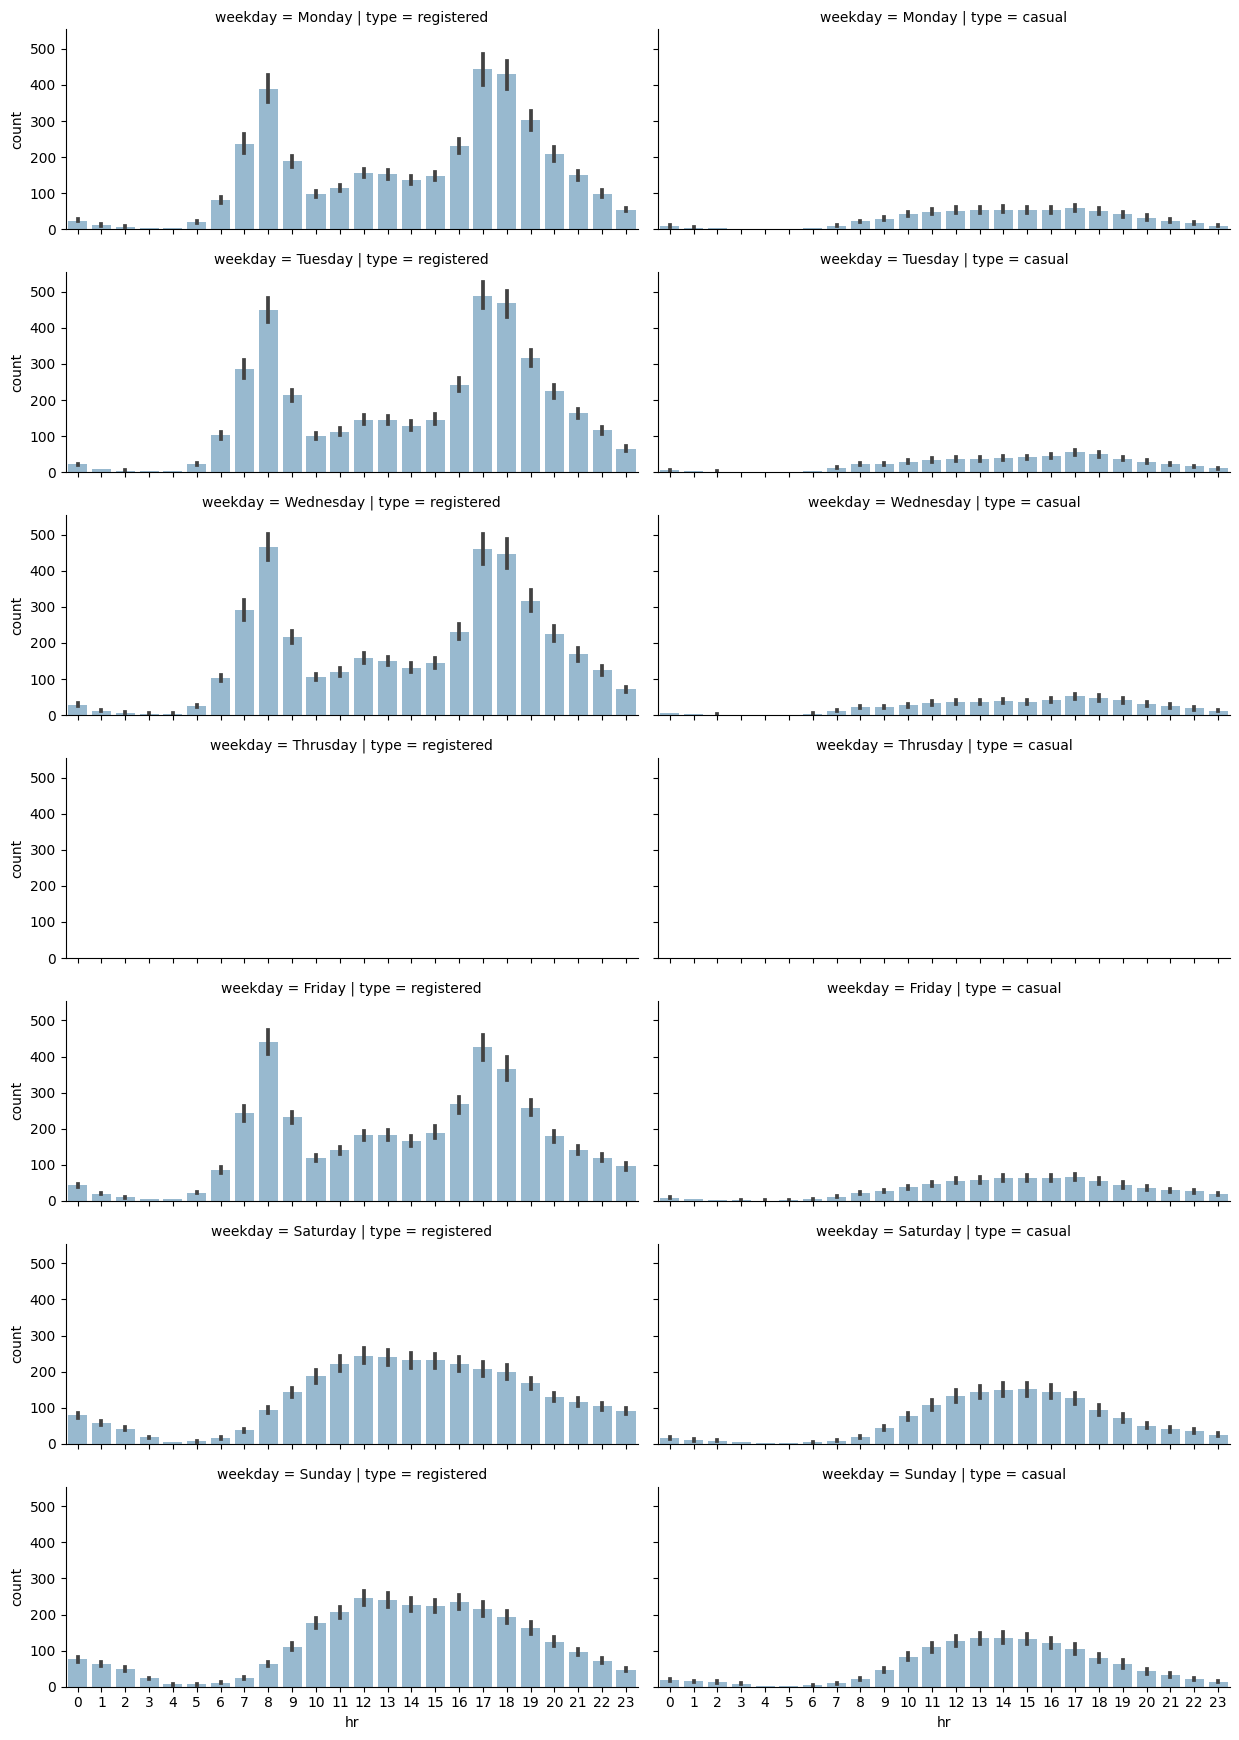

In [22]:
# select relevant columns

plot_data = preprocessed_data[['hr', 'weekday', 'registered', 'casual']]

"""
transform the data into a format, in number of entries are computed as count,

for each distinct hr, weekday and type (registered or casual)

"""

plot_data = plot_data.melt(id_vars=['hr', 'weekday'], var_name = 'type', value_name = 'count')

'''create FacetGrid object, in which a grid plot is produced.
As columns, we have the various days of the week,
as rows, the different types (registered and casual)'''

grid = sns.FacetGrid(plot_data, row='weekday', col ='type', height=2.5, aspect=2.5,
                     row_order = ['Monday', 'Tuesday', 'Wednesday', 'Thrusday',
                                   'Friday', 'Saturday', 'Sunday'])

# populate the FacetGrid with the specific plots

grid.map(sns.barplot, 'hr', 'count', alpha = 0.5)
#grid.savefig('figs/weekday_hour_distributions.png', format='png')



Let's focus on the **melt()** function, applied on a **pandas** dataset. It will create a new dataset, in which values are grouped by the hr and weekday columns, while creating two new columns:type (containing the casual and registered values) andcount (containing the respective counts for the **casual** and **registered** types).

The **seaborn.FacetGrid()** function will create a new grid of plots, with rows
corresponding to the different days of the week and columns corresponding to the types. Finally, the **map()** function is applied to each element of the grid, creating the respective plots. The produced plot is shown in Figure 1.6. We can immediately note that on working days, the highest number of rides for registered users takes place around 8 AM and at 6 PM. This is totally in line with our expectations, as it is likely that most registered users use the bike sharing service for commuting. On the other hand, the casual usage of bike sharing services on working days is quite limited, as the plot shows.

During the weekend, we can see that ride distributions change for both casual and registered users. Still, registered rides are more frequent than casual ones, but both the distributions have the same shape, almost uniformly distributed between the time interval of 11 AM to 6 PM.

As a conclusion, we could claim that most of the usage of bike sharing services occurs during working days, right before and right after the standard working time (that is, 9 to 5):

# Exercise 1.02: Analyzing seasonal impact on rides

In this exercise, we will investigate the impact of the different seasons on the total number of rides. Our goal is to create grid plots, similar to the one in Figure 1.6, in which the number of rides will be distributed over hours and weekdays, based on the current season. This exercise is a continuation of Exercise 1.01, Preprocessing Temporal and Weather Features:

In [23]:
preprocessed_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,0,Saturday,0,clear,0.24,0.2879,81.0,0.0,3,13,16
1,2,2011-01-01,winter,2011,1,1,0,Saturday,0,clear,0.22,0.2727,80.0,0.0,8,32,40
2,3,2011-01-01,winter,2011,1,2,0,Saturday,0,clear,0.22,0.2727,80.0,0.0,5,27,32
3,4,2011-01-01,winter,2011,1,3,0,Saturday,0,clear,0.24,0.2879,75.0,0.0,3,10,13
4,5,2011-01-01,winter,2011,1,4,0,Saturday,0,clear,0.24,0.2879,75.0,0.0,0,1,1


In [24]:
# select subset of the data
plot_data = preprocessed_data[['hr','season','registered','casual']]
plot_data.head(15)

,hr,season,registered,casual
0,0,winter,13,3
1,1,winter,32,8
2,2,winter,27,5
3,3,winter,10,3
4,4,winter,1,0
5,5,winter,1,0
6,6,winter,0,2
7,7,winter,2,1
8,8,winter,7,1
9,9,winter,6,8


In [25]:
#unpivot data from wide to long format
plot_data = plot_data.melt(id_vars= ['hr', 'season'], var_name='type', value_name='count')
#plot_data.head(12)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


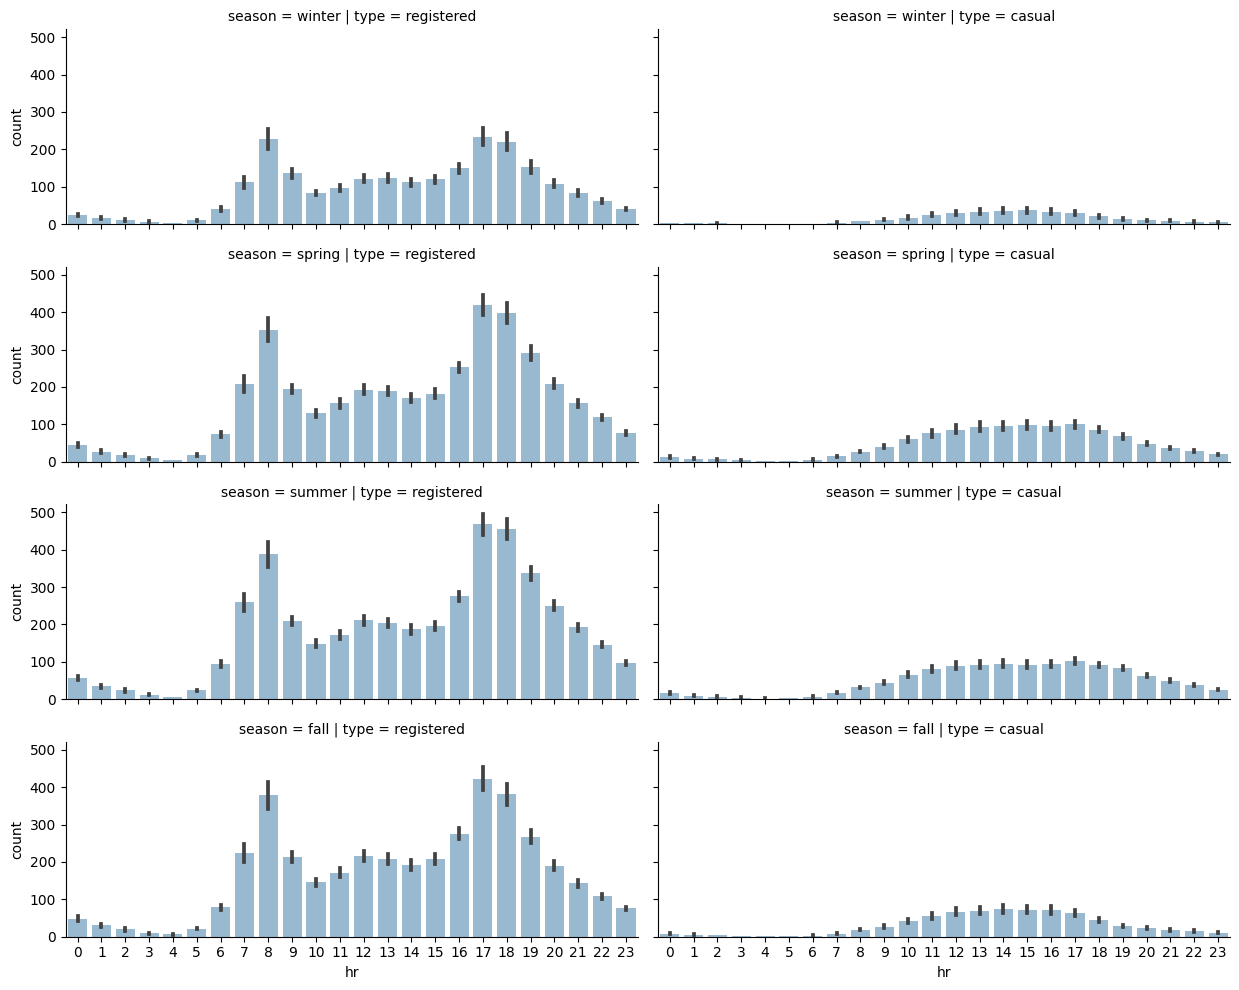

In [27]:
#Define the seaborn FaceGrid object, in which rows represent the different seasons

grid = sns.FacetGrid(plot_data, row='season', col='type', height=2.5,
                   aspect=2.5, row_order=['winter', 'spring','summer','fall'])

#apply plotting function to each element in the grid
grid.map(sns.barplot, 'hr','count', alpha=0.5)

#save figure
#grid.savefig('figs/exercise_1_02_a.png', format='png')

As can be seen in the plot, while each season has a similar graph shape, the
count is lower for the winter graph. So there are fewer rides (registered and
casual) during winter. This makes sense, as fewer rides are likely to occur when
the weather conditions are poor.
For the second part of the exercise (the distribution of rides on a weekday basis),
we proceed just as we did in the first part.

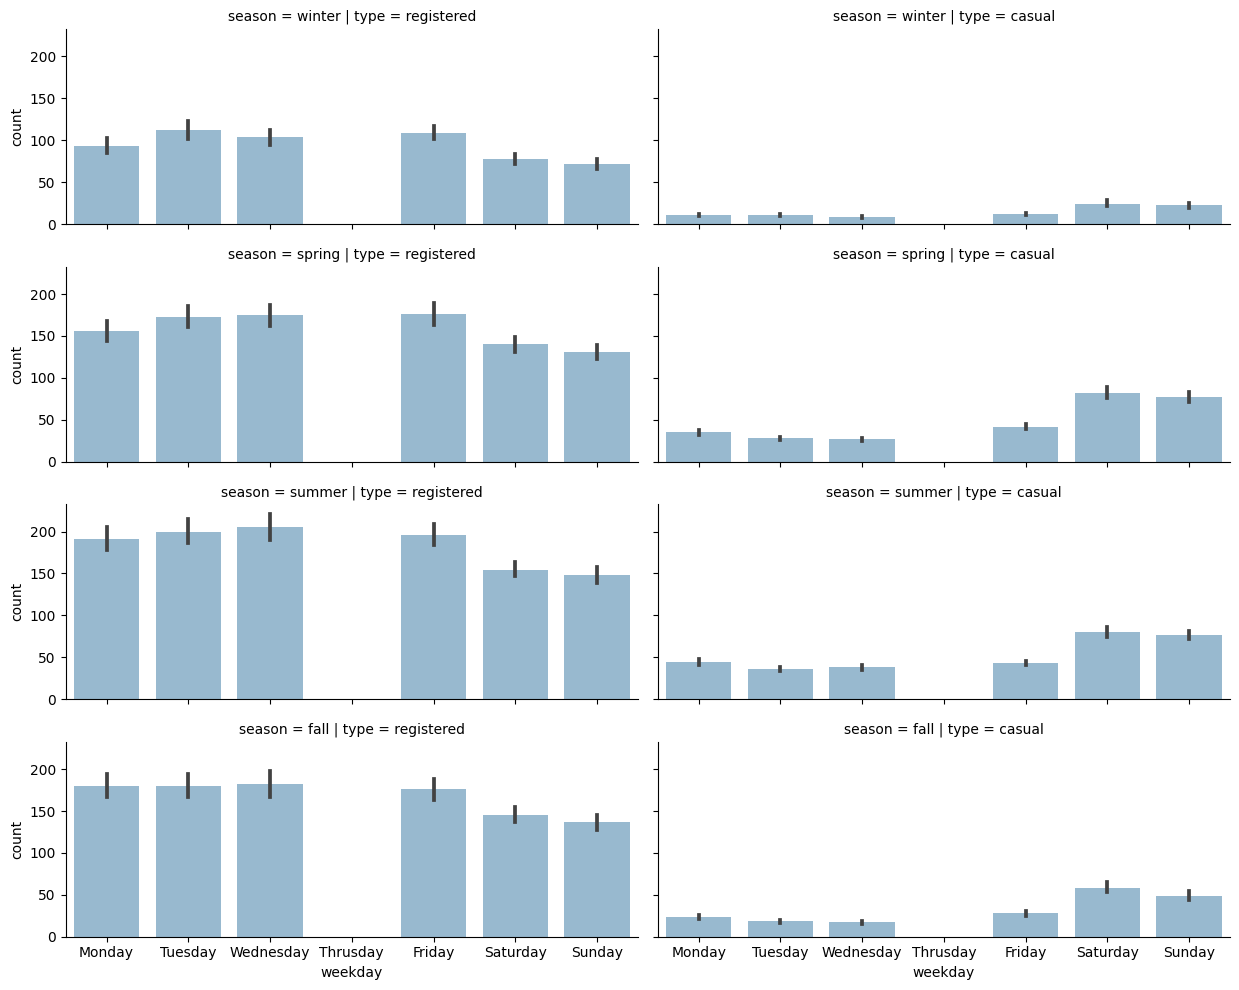

In [28]:
'''First, create a subset of the initial preprocessed data, containing only the
relevant columns (weekday, season, registered, and casual):'''

plot_data = preprocessed_data[['weekday','season','registered', 'casual']]

#Again unpivot the data from wide to long format, but this time use weekday and season as grouping variables:

plot_data = plot_data.melt(id_vars=['weekday','season'], var_name = 'type', value_name= 'count')

#The FacetGrid object is created using the seaborn.FacetGrid() function:

grid = sns.FacetGrid(plot_data, row='season', col='type', height=2.5, aspect=2.5,
                    row_order=['winter', 'spring', 'summer','fall'])

#Finally, apply the seaborn.barplot() function to each of the elements in the FacetGrid object:
grid.map(sns.barplot, 'weekday', 'count', alpha=0.5,
         order= ['Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday','Sunday'])


Note that we are also specifying the order of the days of the week, which is
passed as a parameter to the seaborn.barplot() function. The resulting
plot is shown in the following figure:

An interesting pattern occurs from the analysis conducted in Exercise 1.02, Analyzing Seasonal Impact on Rides. There is a decreasing number of registered rides over the weekend (compared to the rest of the week), while the number of casual rides
increases. This could enforce our initial hypothesis, that is, that registered customers mostly use the bike sharing service for commuting (which could be the reason for the decreasing number of registered rides over the weekend), while casual customers
use the service occasionally over the weekend. Of course, such a conclusion cannot be based solely on plot observations but has to be backed by statistical tests, which is the topic of our next section.

# Hypotheis testing


Hypothesis testing is a branch of inferential statistics, that is, a part of the statistics
field in which a general conclusion can be done about a large group (a population)
based on the analysis and measurements performed on a smaller group (a sample).
A typical example could be making an estimation of the average height of a country's
citizens (in this case, the population) based on measurements performed on a
thousand people (the sample). Hypothesis testing tries to address the question, **"Is a
certain hypothetical value in line with the value obtained by direct measurements
or not?"**
Although various statistical tests are known in the literature and in practice, the
general idea can be summarized in the following steps:

• **Definition of null and alternative hypotheses:** In this first step, a null
hypothesis (denoted as H0) is defined (let's say H0 is 'the average country's
population height is 175 cm'). This is the hypothesis that is going to be tested
by the statistical test. The alternative hypothesis (denoted as Ha) consists of the
complement statement of the null hypothesis (in our example, the alternative
hypothesis, Ha, is 'the average height is not 175 cm'). The null and alternative
hypotheses always complement one another.

• **Identifying the appropriate test statistic:** A test statistic is a quantity whose
calculation is based on the sample, and whose value is the basis for accepting or
rejecting the null hypothesis. In most of these cases, it can be computed by the
following formula:

**test statistics = (sample satistics - value under null  hypothesis)/ standard error of sample statistics**


Here, the sample statistic is the statistic value computed on the sample (in our
case, the average height of a thousand people); the value under null hypothesis
is the value, assuming that the null hypothesis holds (in this case, 175 cm);
and the standard error of the sample statistic is the standard error in the
measurement of the sample. Once the test statistic is identified and computed,
we have to decide what type of probability distribution it follows. In most of the
cases, the following probability distributions will be used: Student's t-distribution
(for t-tests); Standard normal or z-distribution (for z-tests); Chi-squared
distribution (for a chi-squared test) and F-distribution (for F-tests).

Choosing which distribution to use depends on the sample size and the type
of test. As a rule of thumb, if the sample size is greater than 30, we can expect
that the assumptions of the central limit theorem hold and that the test statistic
follows a normal distribution (hence, use a z-test). For a more conservative
approach, or for samples with less than 30 entries, a t-test should be used (with
a test statistic following Student's t-distribution).

• **Specifying the significance level:** Once the test statistic has been calculated,
we have to decide whether we can reject the null hypothesis or not. In order
to do that, we specify a significance level, which is the probability of rejecting a
true null hypothesis. A general approach is to specify a level of significance of
5%. This means that we accept that there is a 5% probability that we reject the
null hypothesis while being true (for a more conservative approach, we could
always use 1% or even 0.5%). Once a significance level is specified, we have to
compute the rejection points, which are the values with which the test statistic
is compared. If it is larger than the specified rejection point(s), we can reject
the null hypothesis and assume that the alternative hypothesis is true. We can
distinguish two separate cases here.

**Two-sided tests:** These are tests in which the null hypothesis assumes that the
value "is equal to" a predefined value. For example, the average height of the
population is equal to 175 cm. In this case, if we specify a significance level of
5%, then we have two critical values (one positive and one negative), with the
probability of the two tails summing up to 5%. In order to compute the critical
values, we have to find the two percentiles of a normal distribution, such that
the probability within those two values is equal to 1 minus the significance level.
For example, if we assume that the sample mean of the height follows a normal
distribution, with a level of significance for our test of 5%, then we need to
find the two percentiles, with the probability that a value drawn from a normal
distribution falls outside of those values, equal to 0.05. As the probability is split
between the two tails, the percentiles that we are looking at are the 2.5 and 97.5
percentiles, corresponding to the values -1.96 and 1.96 for a normal distribution.
Hence, we will not reject the null hypothesis if the following holds true:
               **-1.96 <= test statistic <= 1.96**

If the preceding formula does not hold true, that is, the test statistic is
greater than 1.96 or less than -1.96, we will reject the null hypothesis.

• **One-sided tests:** These are tests in which the null hypothesis assumes that
the value is "greater than" or "less than" a predefined value (for example, the
average height is greater than 175 cm). In that case, if we specify a significance
level of 5%, we will have only one critical value, with a probability at the tail
equal to 5%. In order to find the critical value, we have to find the percentile of a
normal distribution, corresponding to a probability of 0.05 at the tail. For tests
of the "greater than" type, the critical value will correspond to the 5-th percentile,
or -1.645 (for tests following a normal distribution), while for tests of the "less
than" type, the critical value will correspond to the 95-th percentile, or 1.645. In
this way, we will reject the null hypothesis for tests "greater than" if the following
holds true:

  **test statistic < -1.645**
       
Figure 1.11: Test statistic limit for a one-sided test

Whereas, for tests of the "less than" type, we reject the null hypothesis if the
following is the case:

   **test statistic > 1.645**

Figure 1.12: Test statistic limit for a one-sided test

Note that, quite often, instead of computing the critical values of a certain significance
level, we refer to the **p-value of the test.** The p-value is the smallest level of
significance at which the null hypothesis can be rejected. The p-value also provides
the probability of obtaining the observed sample statistic, assuming that the null
hypothesis is correct. If the obtained p-value is less than the specified significance
level, we can reject the null hypothesis, hence the p-value approach is, in practice, an
alternative (and, most of the time, a more convenient) way to perform
hypothesis testing.
Let's now provide a practical example of performing hypothesis testing with Python.



## Exercise 1.03: Estimating Average Registered Rides

In this exercise, we will show how to perform hypothesis testing on our bike sharing
dataset. This exercise is a continuation of Exercise 1.02, Analyzing Seasonal Impact
on Rides:

1. Start with computing the average number of registered rides per hour. Note
that this value will serve in formulating the null hypothesis because, here, you
are explicitly computing the population statistic—that is, the average number
of rides. In most of the cases, such quantities are not directly observable and, in
general, you only have an estimation for the population statistics:

In [29]:
# compute population mean of registered rides
population_mean = preprocessed_data.registered.mean()
print(population_mean)

153.78686920996606


2. Suppose now that you perform certain measurements, trying to estimate the
true average number of rides performed by registered users. For example,
register all the rides during the summer of 2011 (this is going to be your sample):

In [30]:
# get sample of the data (summer 2011)
sample = preprocessed_data[(preprocessed_data.season == "summer") & (preprocessed_data.yr == 2011)].registered

print(sample)

4010     23
4011     12
4012      5
4013      2
4014      7
       ... 
6245    388
6246    250
6247    194
6248    166
6249     99
Name: registered, Length: 2240, dtype: int64


3. Specify the significance level. A standard value is 0.05 (that is, when performing
the statistical test), if the p-value obtained by the statistical test is less than 0.05,
you can reject the null hypothesis by at least 95%. The following code snippet
shows you how to do that:

In [31]:
# perform t-test and compute p-value
from scipy.stats import ttest_1samp

test_result = ttest_1samp(sample, population_mean)
print(f"Test statistic: {test_result[0]}, p-value: {test_result[1]}")

Test statistic: -3.4919691483786197, p-value: 0.0004887645279519505


The result of the previous test returns a p-value smaller than 0.001, which is less
than the predefined critical value. Therefore, you can reject the null hypothesis
and assume that the alternative hypothesis is correct.
Note that you have to make an important observation here: You computed the
average number of rides on the true population; therefore, the value computed
by the statistical test should be the same. So why have you rejected the null
hypothesis? The answer to that question lies in the fact that your sample is not
a true representation of the population, but rather a biased one. In fact, you
selected only entries from the summer of 2011. Therefore, neither data from the
full year is present, nor entries from 2012.

4. In order to show how such mistakes can compromise the results of statistical
tests, perform the test again, but this time taking as a sample 5% of the
registered rides (selected randomly). The following code snippet performs that:

In [32]:
# get sample as 5% of the full data

import random
random.seed(111)
sample_unbiased = preprocessed_data.registered.sample(frac=0.05)
test_result_unbiased = ttest_1samp(sample_unbiased, population_mean)

print(f"Unbiased test statistic:{test_result_unbiased[0]}, p-value: {test_result_unbiased[1]} ")

Unbiased test statistic:-1.0785749294324325, p-value: 0.28107689491443566 


This time, the computed p-value is equal to 0.45, which is much larger than the critical
0.05, and so, you cannot reject the null hypothesis.

In this exercise, we performed hypothesis testing with Python on the bike sharing
dataset. Furthermore, we saw the importance of having an unbiased sample of the
data, as test results can be easily compromised if working with biased data.
Quite often, when performing statistical tests, we want to compare certain statistics
on two different groups (for example, the average height between women and men)
and estimate whether there is a statistically significant difference between the values
obtained in the two groups. Let's denote, with μ1 and μ2, the hypothetical means of
the two groups, where we will have:
• A null hypothesis: H0:μ1-μ2 ≠ 0
• An alternative hypothesis: Ha:μ1-μ2 ≠ 0
Let's denote, with and , the sample means (that is, the means obtained from the
two groups), where the test statistic takes the following form:

###### ![image.png](attachment:image.png)

Here, n1 and n2 are the number of samples in the two groups, while is the pooled
estimator of the common variance, computed as follows:

#####  ![image.png](attachment:image.png)

Here, and are the variances of the two groups. Note that the test statistic, in
this case, follows Student's t-distribution with n1+n2-2 degrees of freedom.

As in the previous case, most of the time, we don't have to compute the test statistics
by ourselves, as Python already provides handy functions for that, plus the alternative
approach of accepting or rejecting the null hypothesis using the p-value is still valid.

Let's now focus on a practical example of how to perform a statistical test between
two different groups. In the previous section, we observed, graphically, that
registered users tend to perform more rides during working days than the weekend.
In order to assess this statement, we will perform a hypothesis test in which we will
test whether the mean of registered rides during working days is the same as during
the weekend. This is done in the following exercise.

## Exercise 1.04: Hypothesis Testing on Registered Rides

In this exercise, we will be performing a hypothesis on registered rides. This exercise
is a continuation of Exercise 1.03, Estimating Average Registered Rides:
1. First, formulate the null hypothesis. As mentioned earlier, you are interested
in identifying whether there is a statistically significant difference between
registered rides during working days and the weekend. Therefore, our null
hypothesis is that the average number of rides for registered users during
working days is the same as the average number of rides during the weekend. In
other words:

H_0 : average registered rides over weekdays-average registered rides over
weekend=0
and

H_a : average registered rides over weekdays-average registered rides over
weekend≠0

2. Once the null hypothesis is established, collect data for the two groups. This is
done with the following code snippet:

In [33]:
# define mask, indicating if the day is weekend or work day
weekend_days = ['Saturday', 'Sunday']
weekend_mask = preprocessed_data.weekday.isin(weekend_days)
workingdays_mask = ~preprocessed_data.weekday.isin(weekend_days)

#select registered rides for the weekend and working days
weekend_data = preprocessed_data.registered[weekend_mask]
workingdays_data = preprocessed_data.registered[workingdays_mask]


3. Perform the two-sample t-tests by using the scipy.stats.
ttest_ind function:

In [34]:
# perform ttest
from scipy.stats import ttest_ind
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f}, p-value: {test_res[1]:.03f}")

Statistic value: -16.004, p-value: 0.000


The resulting p-value from this test is less than 0.0001, which is far below the
standard critical 0.05 value. As a conclusion, we can reject the null hypothesis
and confirm that our initial observation is correct: that is, there is a statistically
significant difference between the number of rides performed during working
days and the weekend.

4. Plot the distributions of the two samples:

<ipython-input-35-5b16cee207eb>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weekend_data, label='weekend days')
<ipython-input-35-5b16cee207eb>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(workingdays_data, label='working days')


Text(0.5, 1.0, 'Registered rides distributions')

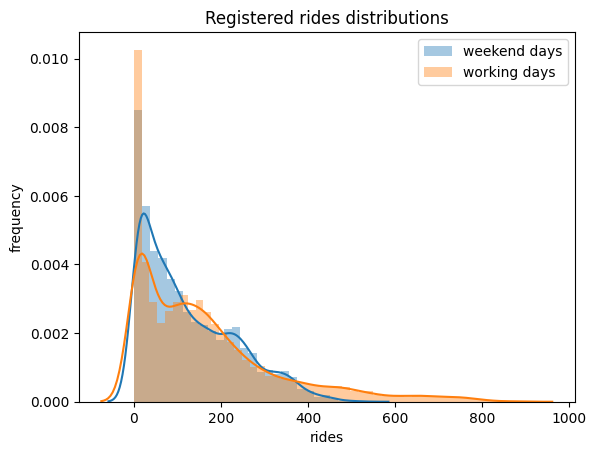

In [35]:
"""
plot distributions of registered rides for working vs weekend days
"""
sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Registered rides distributions")
#plt.savefig('figs/exercise_1_04_a.png', format='png')

5. Perform the same type of hypothesis testing to validate the second assumption
from the last section— that is, casual users perform more rides during the
weekend. In this case, the null hypothesis is that the average number of rides
during working days is the same as the average number of rides during the
weekend, both performed only by casual customers. The alternative hypothesis
will then result in a statistically significant difference in the average number of
rides between the two groups:

Statistic value: 41.077, p-value: 0.000


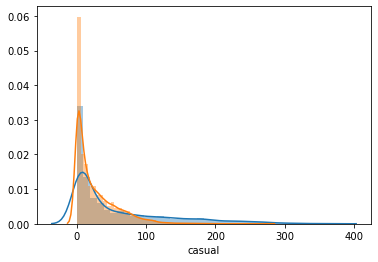

In [ ]:
# select casual rides for the weekend and working days
weekend_data = preprocessed_data.casual[weekend_mask]
workingdays_data = preprocessed_data.casual[workingdays_mask]

# perform ttest
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f}, p-value: {test_res[1]:.03f}")

# plot distributions of casual rides for working vs weekend days
sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working days')

The p-value returned from the previous code snippet is 0, which is strong
evidence against the null hypothesis. Hence, we can conclude that casual
customers also behave differently over the weekend (in this case, they tend to
use the bike sharing service more) as seen in the following figure:

In conclusion, we can say that there is a statistically significant difference between
the number of rides on working days and weekend days for both casual and
registered customers.

## Analysis of weather-related features
Let's now focus on an analysis of the group of features representing the weather
conditions. Our expectation is to observe a strong dependency of those features on
the current number of rides, as bad weather can significantly influence bike
sharing services.

The weather features we identified earlier are the following:

• weathersit: This is a categorical variable representing the current weather
situation. We encoded this variable with the following four values:

#### ![image.png](attachment:image.png)

• temp: This is the normalized temperature in Celsius. Values are divided by
41, which means that the highest registered temperature in the data is 41°C
(corresponding to 1 in our dataset).

• atemp: The normalized feeling temperature in Celsius. Values are divided by
50, which means that the highest registered temperature in the data is 50°C
(corresponding to 1 in our dataset).

• hum: The humidity level as a percentage.

• windspeed: The wind speed in m/s.

From the provided descriptions, we can see that most of the weather-related features
assume continuous values (except for weathersit). Furthermore, as both our
variables of interest (the casual and registered number of rides) are also
continuously distributed, the first and most common way to measure the relationship
between two different continuous variables is to measure their correlation.

**Correlation (also known as Pearson's correlation)** is a statistic that measures the
degree to which two random variables move in relation to each other. In practice,
it provides a numerical measure (scaled between -1 and 1), through which we can
identify how much one of the variables would move in one direction, assuming that
the other one moves. Let's denote, with X and Y, the two random variables. The
correlation coefficient between X and Y is denoted with ρ(X,Y) and is computed by
the formula:

![image.png](attachment:image.png)

Here, Xbar and Ybar and denote the mean of the two variables, and Xi and Yi represent the
individual data points in set X and set Y. A positive correlation between X and Y
means that increasing one of the values will increase also the other one, while a
negative correlation means that increasing one of the values will decrease the
other one.

Let's provide a practical example on computing the correlation between two
variables. As we want to compare several variables, it makes sense to define a
function that performs the analysis between the variables, as we want to follow the
Don't Repeat Yourself principle (commonly known as DRY):

In [36]:
def plot_correlations(data, col):
# get correlation between col and registered rides
    corr_r = np.corrcoef(data[col], data["registered"])[0,1]

    ax = sns.regplot(x=col, y="registered", data=data,
                  scatter_kws={"alpha":0.05},
                  label=f"Registered rides(correlation: {corr_r:.3f})")

# get correlation between col and casual rides
    corr_c = np.corrcoef(data[col], data["casual"])[0,1]

    ax = sns.regplot(x=col, y='casual', data=data,
                 scatter_kws={"alpha":0.05},
                label=f"Casual rides (correlation: {corr_c:.3f})")

#adjust legend alpha
    legend = ax.legend()
    for lh in legend.legendHandles:
      lh.set_alpha(0.5)
      ax.set_ylabel("rides")
      ax.set_title(f"Correlation between rides and {col}")
      return ax


Applying the previously defined function to the four columns (temp, atemp, hum,
and windspeed) returns the following figure:

<ipython-input-36-14c2e9bece82>:18: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


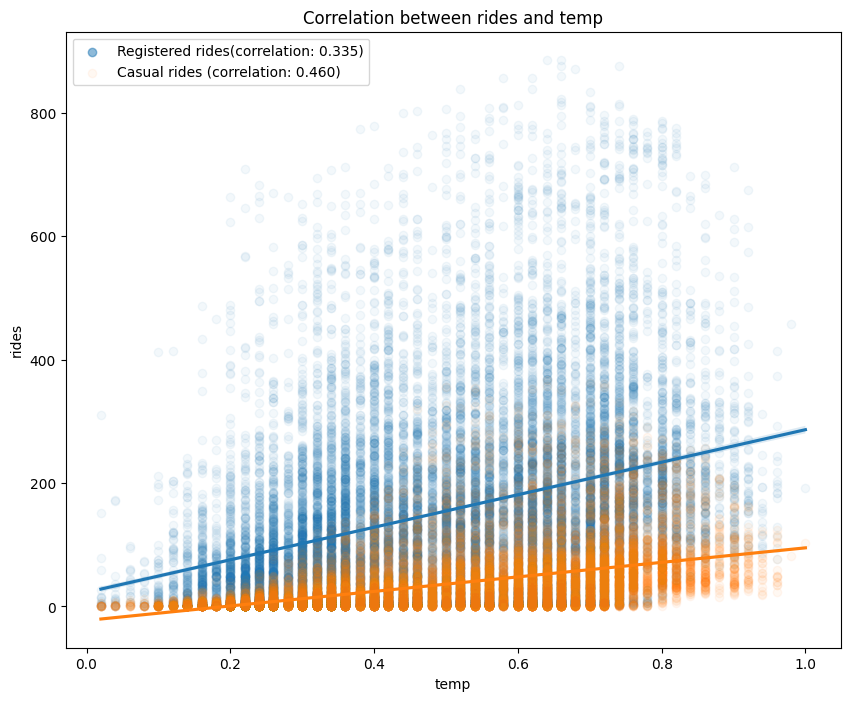

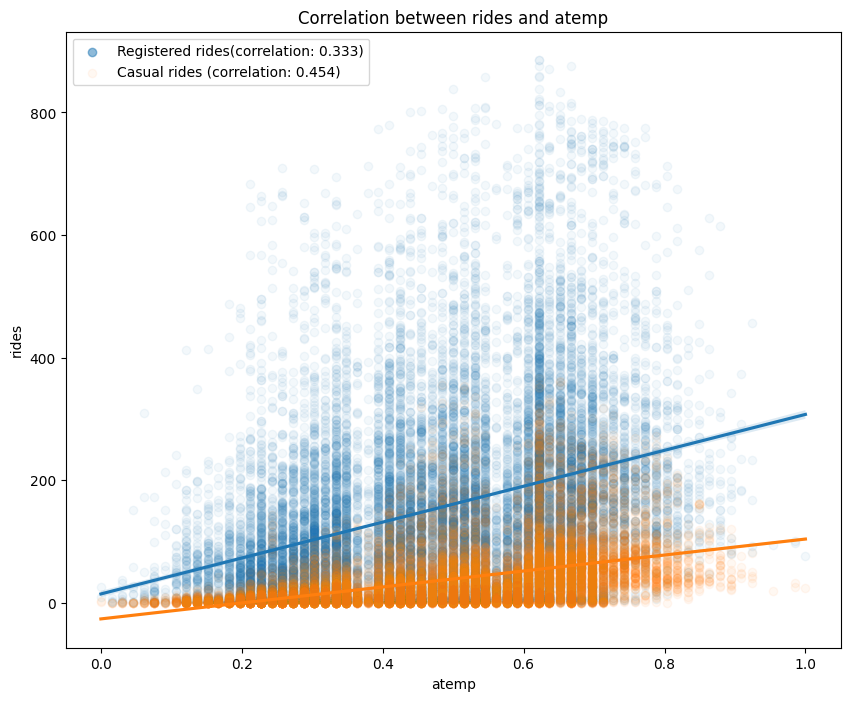

In [38]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'temp')
#plt.savefig('figs/correlation_temp.png', format='png')
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'atemp')
#plt.savefig('figs/correlation_atemp.png', format='png')

Now plot the correlation between the rides and hum, windspeed
features separately:

<ipython-input-36-14c2e9bece82>:18: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


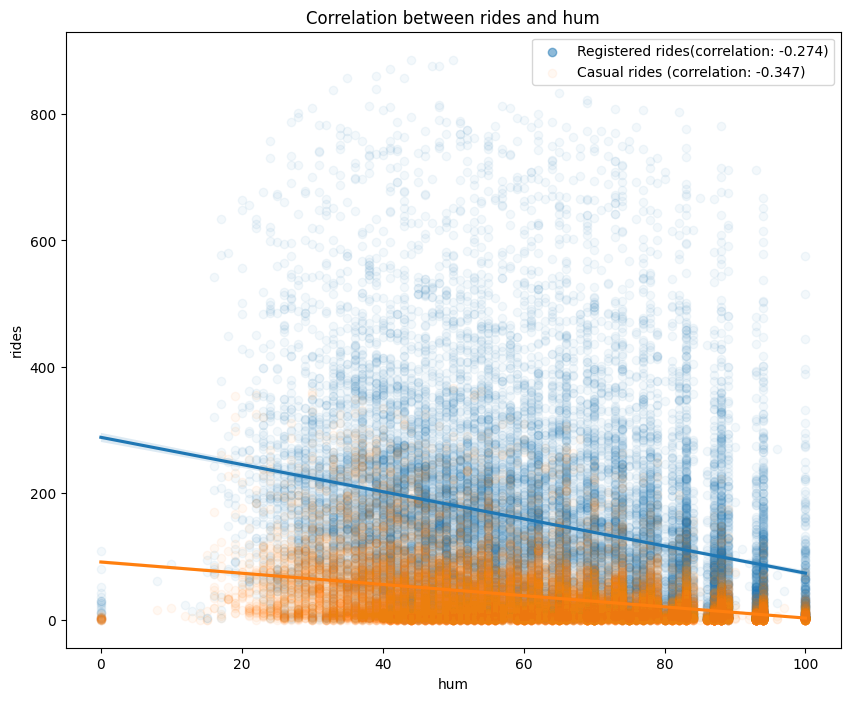

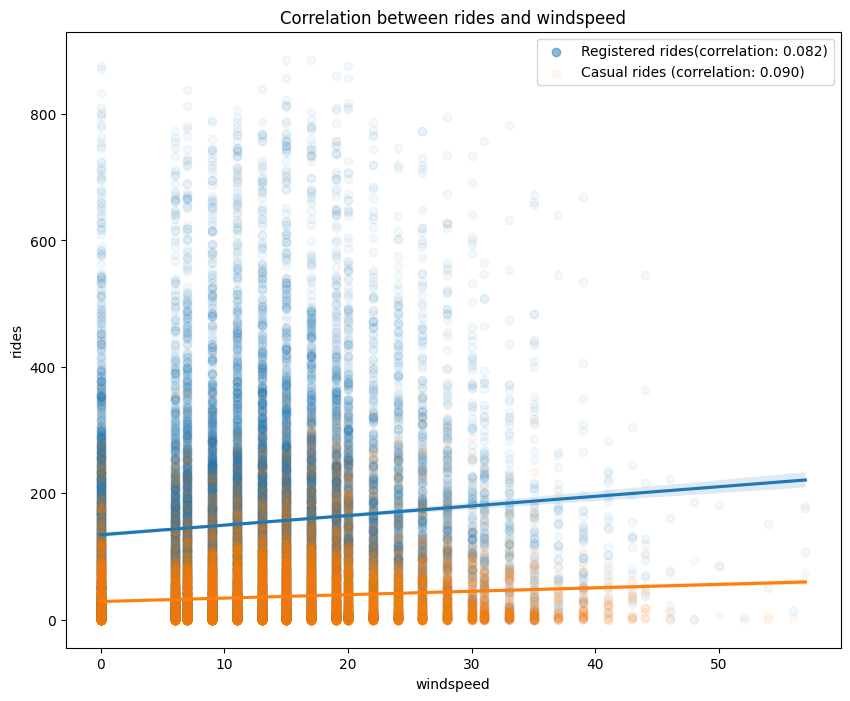

In [39]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'hum')
#plt.savefig('figs/correlation_hum.png', format='png')
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'windspeed')
#plt.savefig('figs/correlation_windspeed.png', format='png')

From Figure 1.19, we can observe that higher temperatures have a positive impact
on the number of rides (the correlation between registered/casual rides and temp is
0.335 and 0.46, respectively, and it's a similar case for atemp). Note that as the values
in the registered column are widely spread with respect to the different values
in temp, we have a lower correlation compared to the casual column. The same
pattern can be observed in Figure 1.21, in which the humidity level has a negative
correlation with both types of rides (-0.274 for registered and -0.347 for casual).
This means that with a high level of humidity (mist or rain), customers will tend not
to use the bike sharing service. From Figure 1.22, we can see that there is minimal
correlation between the number of rides and the wind speed (a weak
positive correlation).

One of the major drawbacks of the correlation coefficient is its assumption of a linear
relationship between the two random variables. This is quite a strong assumption as,
most of the time, relationships in nature are not linear. A measure that generalizes
the Pearson's correlation to monotonic relationships between two variables is the
**Spearman rank correlation.**

Let's illustrate the difference between the two measures in the following example.

## Exercise 1.05: Evaluating the Difference between the Pearson and Spearman Correlations

In this exercise, you will investigate the difference between the Pearson correlation (in
which a linear relationship between the two variables is assumed) and the Spearman
correlation (in which only a monotonic relationship is required). This will help you to
understand the difference between the two types of correlations, especially when the
data does not satisfy the linear assumption. To better present the difference between
the two measures, you will create synthetic data that will serve your purpose:

1. Start by defining your random variables. Create an X variable, which will
represent your independent variable, and two dependent ones, Ylin and Ymon,
which can be expressed as follows:

![image.png](attachment:image.png)

        Figure 1.23: Expression for the dependent variable Ylin

![image.png](attachment:image.png)

         Figure 1.24: Expression for the dependent variable Ymon
         
Here, ε represents a noise component, which is normally distributed with a
mean of 0 and a standard deviation of 0.1:

In [40]:
# define random variables
x = np.linspace(0,5, 100)
y_lin = 0.5*x + 0.1*np.random.randn(100)
y_mon = np.exp(x) + 0.1*np.random.randn(100)

print(y_lin)
print(y_mon)

[-0.10627179  0.07080942  0.04458509  0.02895379 -0.00559647  0.06842367
  0.07808254  0.34252951  0.25910735  0.38067569  0.30350385  0.32647844
  0.3149218   0.45141962  0.44622055  0.18618606  0.46015647  0.51992842
  0.52344563  0.59077651  0.38555884  0.61505551  0.51903363  0.53091819
  0.74850491  0.7180933   0.44110618  0.58741292  0.80381582  0.71879827
  0.55832588  0.45410468  0.89072311  0.59966711  1.01618741  0.68096633
  0.83087857  0.91496129  0.84648505  1.16064489  1.12606552  0.84596586
  0.95233661  1.17430723  1.10198825  1.00647639  1.09691039  1.12640246
  1.05315257  1.28453104  1.24346436  1.33229474  1.28194572  1.4151753
  1.29129369  1.36092096  1.25897748  1.34584713  1.3261769   1.59267617
  1.41027718  1.54566812  1.43412388  1.71046366  1.77792385  1.60396449
  1.60771008  1.71005808  1.97863327  1.78577844  1.7250461   1.79593811
  1.96233669  1.7006432   1.85219487  1.87197937  1.84429805  1.82881129
  1.90599542  2.07614254  2.13941217  2.06187374  1.

2. Compute the Pearson and Spearman correlations using the pearsonr() and
spearmanr() functions in the scipy.stats module:

In [41]:
# compute correlations
from scipy.stats import pearsonr, spearmanr
corr_lin_pearson = pearsonr(x, y_lin)[0]
corr_lin_spearman = spearmanr(x, y_lin)[0]
corr_mon_pearson = pearsonr(x, y_mon)[0]
corr_mon_spearman = spearmanr(x, y_mon)[0]

Note that both the pearsonr() and spearmanr() functions return a
two-dimensional array in which the first value is the respective correlation, while
the second one is the p-value of a hypothesis test in which the null hypothesis
assumes that the computed correlation is equal to zero. This is quite handy
at times, as you not only compute the correlation, but also test its statistical
significance against being zero.

3. Visualize both the data and the computed correlations:

Text(0.5, 1.0, 'Monotonic relationship \nPearson: 0.856, Spearman: 1.000')

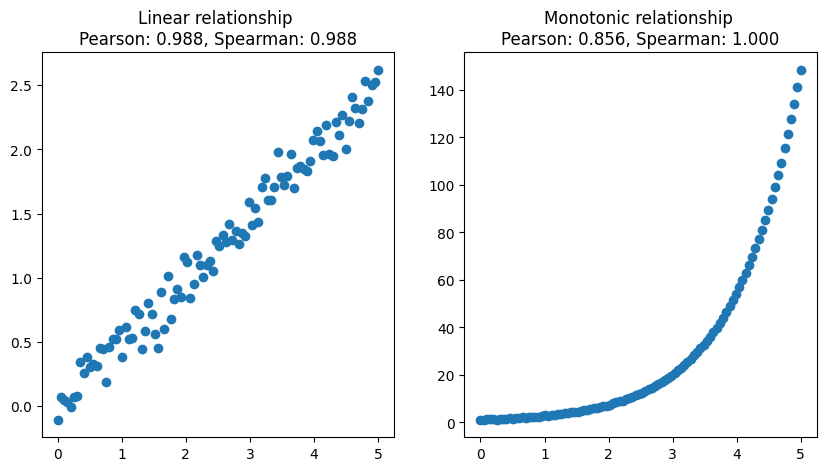

In [43]:
# visualize variables
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.scatter(x, y_lin)
ax1.set_title(f"Linear relationship \nPearson: {corr_lin_pearson:.3f}, Spearman: {corr_lin_spearman:.3f}")

ax2.scatter(x, y_mon)
ax2.set_title(f"Monotonic relationship \nPearson: {corr_mon_pearson:.3f}, Spearman: {corr_mon_spearman:.3f}")

#fig.savefig('figs/exercise_1_05.png', format='png')

      Figure 1.25: The difference between the Pearson and Spearman correlations

As you can see from the preceding figure, when the relationship between the
two variables is linear (the figure on the left), the two correlation coefficients
are very similar. In the monotonic relationship (the figure on the right), the
linear assumption of the Pearson correlation fails, and, although the correlation
coefficient is still quite high (0.856), it is not capable of capturing the perfect
relationship between the two variables. On the other hand, the Spearman
correlation coefficient is 1, which means that it succeeds in capturing the almost
perfect relationship between the two variables.

4. Now return to the bike sharing data and investigate the relationship between
the different variables in light of the difference between the two correlation
measures. Define a function that, on the provided data and column, computes
the Pearson and Spearman correlation coefficients with the registered and
casual rides:

In [44]:
# define function for computing correlations
def compute_correlations(data, col):
    pearson_reg = pearsonr(data[col], data["registered"])[0]
    pearson_cas = pearsonr(data[col], data["casual"])[0]
    spearman_reg = spearmanr(data[col], data["registered"])[0]
    spearman_cas = spearmanr(data[col], data["casual"])[0]
    return pd.Series({"Pearson (registered)": pearson_reg,
                      "Spearman (registered)": spearman_reg,
                      "Pearson (casual)": pearson_cas,
                      "Spearman (casual)": spearman_cas})

Note that the previously defined function returns a pandas.Series() object,
which will be used to create a new dataset containing the different correlations:

In [45]:
# compute correlation measures between different features
cols = ["temp", "atemp", "hum", "windspeed"]
corr_data = pd.DataFrame(index=["Pearson (registered)",
                                "Spearman (registered)",
                                "Pearson (casual)",
                                "Spearman (casual)"])
for col in cols:
  corr_data[col]=compute_correlations(preprocessed_data, col)

corr_data.T

,Pearson (registered),Spearman (registered),Pearson (casual),Spearman (casual)
temp,0.335361,0.373196,0.459616,0.570989
atemp,0.332559,0.373014,0.454080,0.570419
hum,-0.273933,-0.338480,-0.347028,-0.388213
windspeed,0.082321,0.122936,0.090287,0.122920


As we can observe, for most of the variables, the Pearson and Spearman correlation
coefficient are close enough (some non-linearity is to be expected). The most striking
difference between the two coefficients occurs when comparing the temp (and
atemp) and casual columns. More precisely, the Spearman correlation is quite
high, meaning that there is significant evidence for a nonlinear, relatively strong and
positive relationship.

An interpretation of this result is that casual customers are far keener on using the
bike sharing service when temperatures are higher. We have already seen from our
previous analysis that casual customers ride mostly during the weekend, and they
do not rely on bike sharing services for commuting to work. This conclusion is again
confirmed by the strong relationship with temperature, as opposed to registered
customers, whose rides have a weaker correlation with temperature.

## Correlation Matrix Plot
A useful technique when performing a comparison between different continuous
features is the correlation matrix plot. It allows the analyst to quickly visualize any
possible relationships between the different features and identify potential clusters
with highly correlated features.

The next code snippet does that:

(5.5, -0.5)

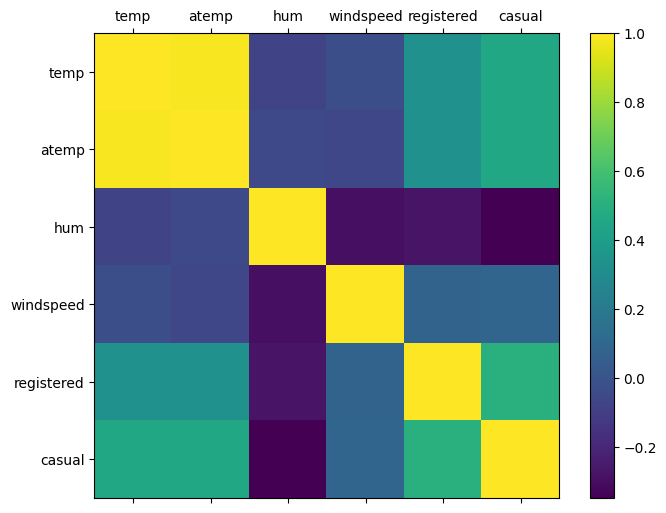

In [46]:
# plot correlation matrix
cols = ["temp", "atemp", "hum", "windspeed", "registered", "casual"]
plot_data = preprocessed_data[cols]
corr = plot_data.corr()

fig = plt.figure(figsize=(8,6))
plt.matshow(corr, fignum=fig.number)
plt.xticks(range(len(plot_data.columns)), plot_data.columns)
plt.yticks(range(len(plot_data.columns)), plot_data.columns)
plt.colorbar()
plt.ylim([5.5, -0.5])

#fig.savefig('figs/correlations.png', format='png')

    Figure 1.27: Correlation matrix between continuous weather features and rides

This concludes our analysis of the weather columns and their impact on the number
of rides. In the next section, we will exploit more advanced techniques for timedependent
features, known as time series analysis.